<a href="https://colab.research.google.com/github/sara-aljuhani/Classification-and-Analyzing-Facial-and-Eye-Features-of-Drugs-Abuser-Using-AI/blob/main/VGG19%26SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
# Function to load and preprocess the dataset
def load_dataset(base_path, target_size=(224, 224)):
    classes = ['Normal', 'Abnormal']
    images = []
    labels = []

    for i, _class in enumerate(classes):
        dir_path = os.path.join(base_path, _class)
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            images.append(img)
            labels.append(i)

    images = np.array(images)
    # Apply VGG19 preprocessing
    images = preprocess_input(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
base_path = '/content/drive/MyDrive/faceDataSet'
images, labels = load_dataset(base_path)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Load VGG19 model for feature extraction
vgg19 = VGG19(weights='imagenet', include_top=True)
model_fc2 = Model(inputs=vgg19.input, outputs=vgg19.get_layer('fc2').output)

# Extract features using VGG19 'fc2' layer
features_train = model_fc2.predict(X_train)
features_test = model_fc2.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [ ]:
 # Scale features for the SVM classifier
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(features_train, y_train)

# Predict and evaluate the classifier
predictions = svm_classifier.predict(features_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.89%


Accuracy: 95.89%
Confusion Matrix:
[[35  2]
 [ 1 35]]


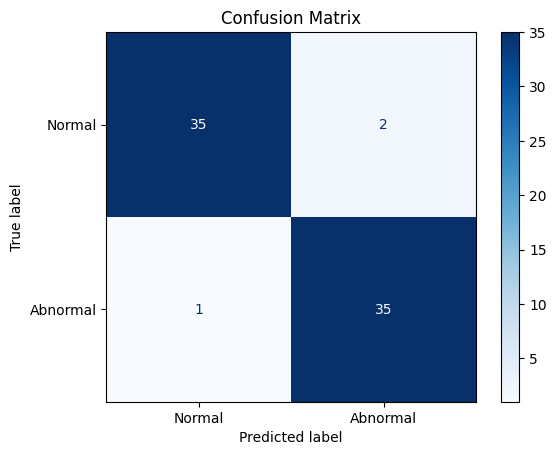

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict and evaluate the classifier
predictions = svm_classifier.predict(features_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix using Matplotlib
import matplotlib.pyplot as plt
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal']).plot(values_format='d' ,  cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `predictions` and `y_test` are defined and contain your model's predictions and the true labels respectively
report = classification_report(y_test, predictions, target_names=['Normal', 'Abnormal'], output_dict=True)


In [ ]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()
print(report_df)


              precision    recall  f1-score    support
Normal         0.972222  0.945946  0.958904  37.000000
Abnormal       0.945946  0.972222  0.958904  36.000000
accuracy       0.958904  0.958904  0.958904   0.958904
macro avg      0.959084  0.959084  0.958904  73.000000
weighted avg   0.959264  0.958904  0.958904  73.000000


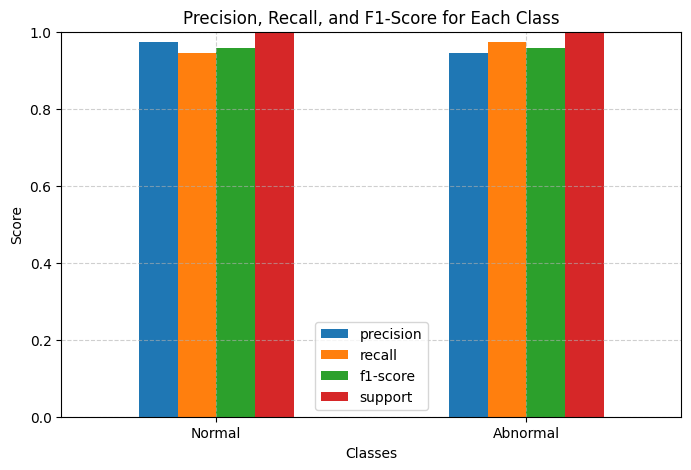

In [ ]:
# Plotting Precision, Recall, and F1-Score
fig, ax = plt.subplots(figsize=(8, 5))
report_df[:-3].plot(kind='bar', ax=ax)  # Skipping the last three rows which are average measures
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])  # Limit y-axis to 1 for readability
plt.xticks(rotation=0)  # Keep the class names horizontal
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
